# Vision Application feat. Google Cloud Vision API

## 初始化 

In [1]:
# case 1: init by assignment

from google.cloud import vision

YOUR_SERVICE = 'gcpai.json'

client = vision.ImageAnnotatorClient.from_service_account_json(YOUR_SERVICE)

In [2]:
# # case 2: init by environment

# import os

# from google.cloud import vision

# YOUR_SERVICE = 'YOUR_SERVICE'

# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = YOUR_SERVICE
# client = vision.ImageAnnotatorClient()

## 準備圖檔

In [3]:
# case 1: one-shot upload
YOUR_PIC = 'toyz.jpg'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [4]:
# # case 2: through GCS

# from google.cloud import storage

# YOUR_BUCKET = 'YOUR_BUCKET'
# YOUR_PIC = 'YOUR_PIC'

# storage_client = storage.Client()
# bucket = storage_client.bucket(YOUR_BUCKET)
# bucket.blob(YOUR_PIC).upload_from_filename(YOUR_PIC)
# image_uri = f'gs://{YOUR_BUCKET}/{YOUR_PIC}'
# source = vision.ImageSource(image_uri=image_uri)
# image = vision.Image(source=source)
# #image = vision.Image()
# #image.source.image_uri = image_uri

## label_detection

In [5]:
response = client.label_detection(image=image)

In [6]:
for label in response.label_annotations:
    print(label.description)

Arm
Facial expression
Muscle
Sleeve
Gesture
Flash photography
Cap
Baseball cap
Eyewear
Fun


In [7]:
response

label_annotations {
  mid: "/m/0dzf4"
  description: "Arm"
  score: 0.944049656
  topicality: 0.944049656
}
label_annotations {
  mid: "/m/01k74n"
  description: "Facial expression"
  score: 0.932487
  topicality: 0.932487
}
label_annotations {
  mid: "/m/04_fs"
  description: "Muscle"
  score: 0.919721961
  topicality: 0.919721961
}
label_annotations {
  mid: "/m/062581"
  description: "Sleeve"
  score: 0.872254491
  topicality: 0.872254491
}
label_annotations {
  mid: "/m/0244x1"
  description: "Gesture"
  score: 0.852604866
  topicality: 0.852604866
}
label_annotations {
  mid: "/g/1tr17zw8"
  description: "Flash photography"
  score: 0.844118953
  topicality: 0.844118953
}
label_annotations {
  mid: "/m/02d46y"
  description: "Cap"
  score: 0.82433784
  topicality: 0.82433784
}
label_annotations {
  mid: "/m/027xyl"
  description: "Baseball cap"
  score: 0.821364224
  topicality: 0.821364224
}
label_annotations {
  mid: "/m/0j272k5"
  description: "Eyewear"
  score: 0.79701972
  to

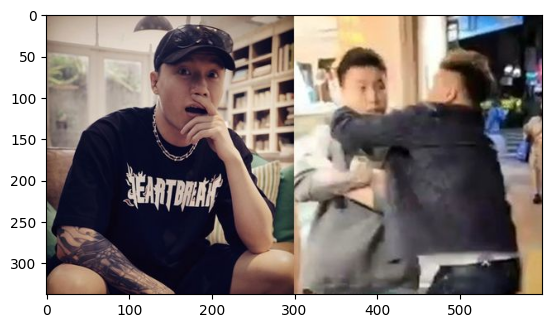

Arm, 0.944
Facial expression, 0.932
Muscle, 0.920
Sleeve, 0.872
Gesture, 0.853
Flash photography, 0.844
Cap, 0.824
Baseball cap, 0.821
Eyewear, 0.797
Fun, 0.762


In [8]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)
plt.imshow(im)
plt.show()

for label in response.label_annotations:
    print(f'{label.description}, {label.score:.3f}')

## face_detection

In [9]:
response = client.face_detection(image=image)

In [10]:
x=[]
y=[]

for v in response.face_annotations[0].bounding_poly.vertices:
#     print(v.x, v.y)
    x.append(v.x)
    y.append(v.y)
x.append(x[0])
y.append(y[0])
    
x, y

([467, 511, 511, 467, 467], [62, 62, 114, 114, 62])

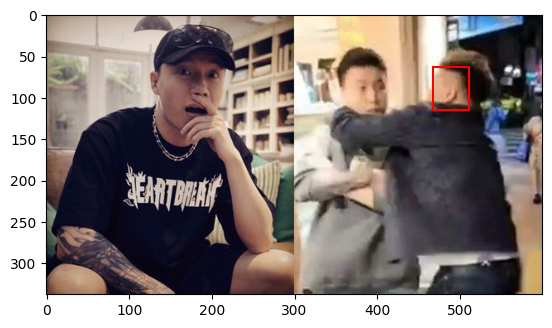

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

image= Image.open('toyz.jpg')
plt.imshow(image)

plt.plot(x, y, color = 'red')

In [12]:
response

face_annotations {
  bounding_poly {
    vertices {
      x: 467
      y: 62
    }
    vertices {
      x: 511
      y: 62
    }
    vertices {
      x: 511
      y: 114
    }
    vertices {
      x: 467
      y: 114
    }
  }
  fd_bounding_poly {
    vertices {
      x: 465
      y: 65
    }
    vertices {
      x: 519
      y: 65
    }
    vertices {
      x: 519
      y: 119
    }
    vertices {
      x: 465
      y: 119
    }
  }
  landmarks {
    type_: LEFT_EYE
    position {
      x: 484.122467
      y: 86.6754303
      z: -0.00277423859
    }
  }
  landmarks {
    type_: RIGHT_EYE
    position {
      x: 476.422974
      y: 84.6711349
      z: -11.59095
    }
  }
  landmarks {
    type_: LEFT_OF_LEFT_EYEBROW
    position {
      x: 484.11731
      y: 83.9039154
      z: 3.06945276
    }
  }
  landmarks {
    type_: RIGHT_OF_LEFT_EYEBROW
    position {
      x: 483.799469
      y: 83.248764
      z: -0.669122696
    }
  }
  landmarks {
    type_: LEFT_OF_RIGHT_EYEBROW
    positi

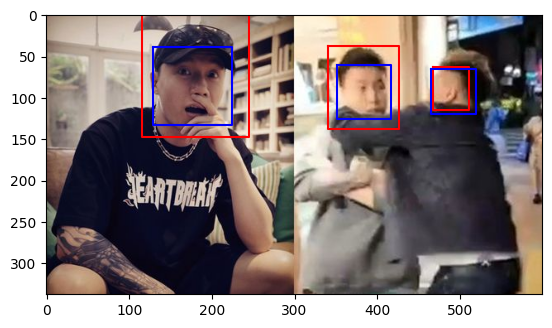

joy: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
anger: VERY_UNLIKELY
surprise: VERY_UNLIKELY
under_exposed: VERY_UNLIKELY
blurred: VERY_UNLIKELY
headwear: VERY_UNLIKELY
joy: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
anger: VERY_UNLIKELY
surprise: VERY_UNLIKELY
under_exposed: VERY_UNLIKELY
blurred: VERY_UNLIKELY
headwear: VERY_UNLIKELY
joy: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
anger: VERY_UNLIKELY
surprise: LIKELY
under_exposed: VERY_UNLIKELY
blurred: VERY_UNLIKELY
headwear: VERY_LIKELY


In [13]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for face in response.face_annotations:
    vs = [{'v': face.bounding_poly.vertices, 'c': 'red'},
          {'v': face.fd_bounding_poly.vertices, 'c': 'blue'}]
    for vd in vs:
        a = [(v.x, v.y) for v in vd['v']]
        a.append(a[0])
        x, y = zip(*a)
        plt.plot(x, y, color=vd['c'])

plt.show()

for face in response.face_annotations:
    print(f'joy: {face.joy_likelihood.name}')
    print(f'sorrow: {face.sorrow_likelihood.name}')
    print(f'anger: {face.anger_likelihood.name}')
    print(f'surprise: {face.surprise_likelihood.name}')
    print(f'under_exposed: {face.under_exposed_likelihood.name}')
    print(f'blurred: {face.blurred_likelihood.name}')
    print(f'headwear: {face.headwear_likelihood.name}')

## text_detection

In [14]:
# # case 1: one-shot upload

# YOUR_PIC = 'toyz.jpg'

# with open(YOUR_PIC, 'rb') as image_file:
#     content = image_file.read()
# image = vision.Image(content=content)

In [15]:
# response = client.text_detection(image=image, image_context=image_context)

In [16]:
# response

In [17]:
# import matplotlib.pyplot as plt
# from PIL import Image

# im = Image.open(YOUR_PIC)

# plt.imshow(im)

# for text in response.text_annotations:
#     print(text.description)
#     a = [(v.x, v.y) for v in text.bounding_poly.vertices]
#     a.append(a[0])
#     x, y = zip(*a)
#     plt.plot(x, y, color='blue')

# plt.show()

## document_text_detection

In [18]:
# case 1: one-shot upload

YOUR_PIC = 'toyz.jpg'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [19]:
response = client.document_text_detection(image=image)

SEARTBREAK
SEARTBREAK


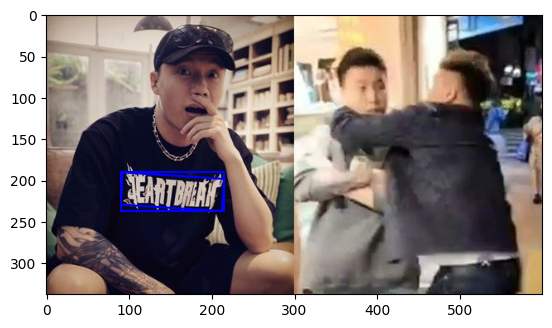

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')

plt.show()

## object_localization

In [21]:
# case 1: one-shot upload

YOUR_PIC = 'toyz.jpg'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [22]:
response = client.object_localization(image=image)

In [23]:
response.localized_object_annotations

[mid: "/m/03gx245"
name: "Top"
score: 0.891827643
bounding_poly {
  normalized_vertices {
    x: 0.0169002675
    y: 0.336905688
  }
  normalized_vertices {
    x: 0.44749251
    y: 0.336905688
  }
  normalized_vertices {
    x: 0.44749251
    y: 0.961696625
  }
  normalized_vertices {
    x: 0.0169002675
    y: 0.961696625
  }
}
, mid: "/m/02dl1y"
name: "Hat"
score: 0.875476062
bounding_poly {
  normalized_vertices {
    x: 0.204699948
    y: 0.0311213136
  }
  normalized_vertices {
    x: 0.390463501
    y: 0.0311213136
  }
  normalized_vertices {
    x: 0.390463501
    y: 0.221108139
  }
  normalized_vertices {
    x: 0.204699948
    y: 0.221108139
  }
}
, mid: "/m/01g317"
name: "Person"
score: 0.843997061
bounding_poly {
  normalized_vertices {
    x: 0.000779203605
    y: 0.036016155
  }
  normalized_vertices {
    x: 0.480459571
    y: 0.036016155
  }
  normalized_vertices {
    x: 0.480459571
    y: 0.987880647
  }
  normalized_vertices {
    x: 0.000779203605
    y: 0.987880647

In [24]:
# dx, dy=image.size
# dx, dy

In [25]:
# x=[]
# y=[]

# for v in response.localized_object_annotations[0].bounding_poly.normalized_vertices:
# #     print(v.x, v.y)
#     x.append(int(dx*v.x))
#     y.append(int(dy *v.y))
# x.append(x[0])
# y.append(y[0])
    
# x, y

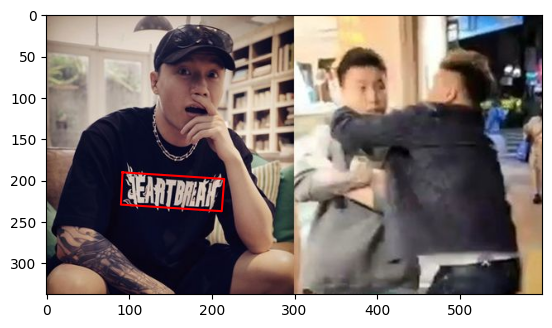

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

image= Image.open('toyz.jpg')
plt.imshow(image)

plt.plot(x, y, color = 'red')

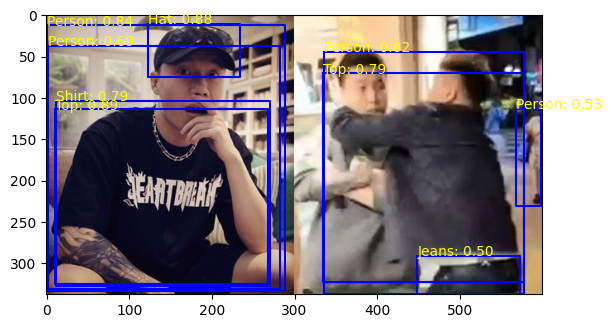

In [27]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

w, h = im.size
for obj in response.localized_object_annotations:
    desc = f'{obj.name}: {obj.score:.2f}'
    a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], desc, color='yellow')

plt.show()

## web_detection

In [28]:
response = client.web_detection(image=image)

TypeError: get() expected a dict or protobuf message, got <class 'PIL.JpegImagePlugin.JpegImageFile'>.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)
plt.imshow(im)
plt.show()

for x in response.web_detection.web_entities:
    print(x.description)
for x in response.web_detection.visually_similar_images :
    print(x.url)
for x in response.web_detection.best_guess_labels:
    print(x) 

## landmark_detection

In [ ]:
# one-shot upload

YOUR_PIC = 'YOUR_PIC'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.landmark_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for text in response.landmark_annotations:
    desc = f'{text.description} @ ' \
           f'({text.locations[0].lat_lng.latitude}, {text.locations[0].lat_lng.longitude})'
    print(desc)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], desc, color='yellow')

plt.show()

## logo_detection

In [ ]:
# one-shot upload

YOUR_PIC = 'YOUR_PIC'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.logo_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for logo in response.logo_annotations :
    print(logo.description)
    a = [(v.x, v.y) for v in logo.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], logo.description, color='yellow')

plt.show()

## safe_search_detection

In [ ]:
# one-shot upload

YOUR_PIC = 'YOUR_PIC'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.safe_search_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)
plt.imshow(im)
plt.show()

print('adult:', response.safe_search_annotation.adult.name)
print('spoof:', response.safe_search_annotation.spoof.name)
print('medical:', response.safe_search_annotation.medical.name)
print('violence:', response.safe_search_annotation.violence.name)
print('racy:', response.safe_search_annotation.racy.name)